In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Input,Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-type-classification/weather_classification_data.csv


In [24]:
df=pd.read_csv("/kaggle/input/weather-type-classification/weather_classification_data.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [26]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [27]:
print(df['Location'].unique())
print(df['Cloud Cover'].unique())
print(df['Season'].unique())

['inland' 'mountain' 'coastal']
['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']


In [28]:
df=pd.get_dummies(df,columns=['Location','Cloud Cover','Season'],drop_first=True)


In [29]:
col=list(df.columns)
col.remove('Weather Type')
X=df[col]
y=df['Weather Type']

In [30]:
X.head()
X.astype(int)

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location_inland,Location_mountain,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter
0,14,73,9,82,1010,2,3,1,0,0,0,1,0,0,1
1,39,96,8,71,1011,7,10,1,0,0,0,1,1,0,0
2,30,64,7,16,1018,5,5,0,1,0,0,0,1,0,0
3,38,83,1,82,1026,7,1,0,0,0,0,0,1,0,0
4,27,74,17,66,990,1,2,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14,71,1003,1,1,0,1,0,1,0,0,1,0
13196,-1,76,3,23,1067,1,6,0,0,1,0,0,0,0,1
13197,30,77,5,28,1012,3,9,0,0,0,1,0,0,0,0
13198,3,76,10,94,984,0,2,1,0,0,1,0,0,0,1


In [31]:
y.shape

(13200,)

In [32]:
y.unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
scaler=MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [34]:
model=Sequential()
model.add(Input(shape=(15,)))
model.add(Dropout(0.4))
model.add(Dense(15,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404 (1.58 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [37]:
history = model.fit(X_train, y_train_encoded, epochs=100, validation_split=0.2, batch_size=64)


Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2469 - loss: 58.1600 - val_accuracy: 0.3527 - val_loss: 1.3371
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2764 - loss: 2.2654 - val_accuracy: 0.2661 - val_loss: 1.3776
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2805 - loss: 1.6527 - val_accuracy: 0.2713 - val_loss: 1.3735
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2929 - loss: 1.4718 - val_accuracy: 0.2462 - val_loss: 1.3873
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3046 - loss: 1.3895 - val_accuracy: 0.2491 - val_loss: 1.3858
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 1.3465 - val_accuracy: 0.2457 - val_loss: 1.3882
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3237 - loss: 1.3238 - val_accuracy: 0.2457 - val_loss: 1.3882
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3379 - loss: 1.3078 - val_acc

In [38]:
y_prob=model.predict(X_test_scaled)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
y_pred=y_prob.argmax(axis=1)

In [40]:
accuracy_score(y_test_encoded,y_pred)

0.5128787878787879

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_encoded, y_pred)

array([[281, 156, 238,   5],
       [161, 237, 273,   7],
       [ 18,  22, 619,   1],
       [189,  19, 197, 217]])

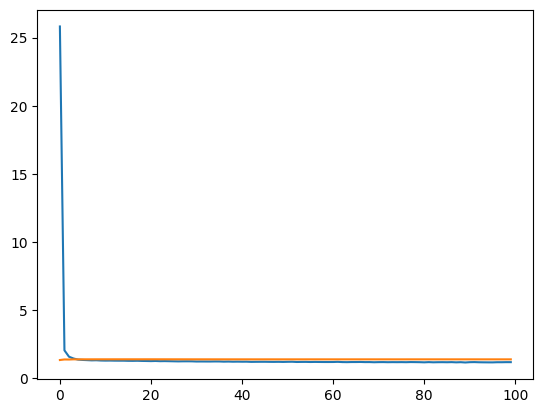

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

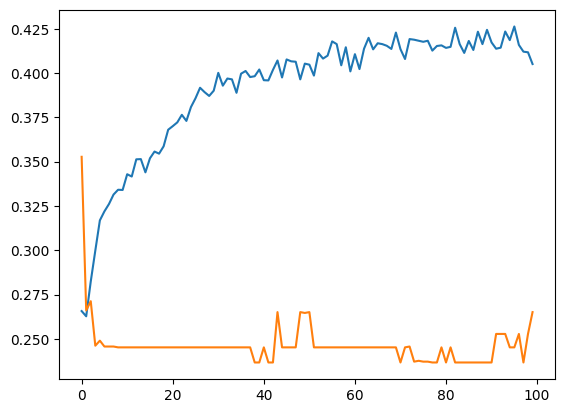

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])